<a href="https://colab.research.google.com/github/nickfiddler/FiddlerCodingPortfolio/blob/main/Betting_Strategy_Black_Jack_MonteCarloSim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This program is going to test an idea that I have to use at a casino. Using basic strategy, there is about 4% chance of getting blackjack, a 38% chance you win the hand with no blackjack, a 50% hand of losing the hand, and an 8% chance of the hand being a draw. I am going to be creating a monte carlo simulation to test the idea using the law of large numbers. My theory is that you can be profitable if you increase how much you bet if you are on a losing streak. Every simulation is going to have the same starting pot (10000) and initial bet (25). Obviously, as the difference between the starting pot and the initial bet increases, you will have a better chance, I chose 10000 and 25 as the starting pot and initial but the odds could increase or decrease depending on what you chose. Assuming each hand of blackjack last a minute and you spend 12 hours in the casino at the table, we will stop every round when the number of hands is 720 or you are unable to finance the current bet

The first strategy that I am going to try is whenever you lose a hand, you double whatever the current bet is.

In [1]:
import random
import statistics
import matplotlib.pyplot as plt

In [2]:
hands_played_lst = []
final_pot_lst = []

for i in range(1,100000):
  pot = 10000
  initial_bet = 25
  current_bet = initial_bet
  hands_played = 0

  while current_bet<pot and hands_played<720:
    #print(f'current bet is {current_bet}, pot is {pot} ')
    hands_played+=1
    x = random.randint(1,100)
    if x<=4:
      pot = pot+ 1.5*current_bet
      current_bet = initial_bet
    elif x>=5 and x<=42:
      pot = pot + current_bet
      current_bet = initial_bet
    elif x>=43 and x<=92:
      pot = pot - current_bet
      current_bet = current_bet*2
    else:
      pot = pot
      current_bet = current_bet
    if current_bet>pot or hands_played ==720:
      #print(f'You played {hands_played} hands. Final pot is {pot}')
      hands_played_lst.append(hands_played)
      final_pot_lst.append(pot)

In [3]:
print(f'The initial pot was $10,000.00 and the initial bet was $25.00')
avg_hands = statistics.mean(hands_played_lst)
sd_hands = statistics.stdev(hands_played_lst)
max_hands = max(hands_played_lst)
min_hands = min(hands_played_lst)
print(f'The average number of hands played is {avg_hands:,.2f}')
print(f'The standard deviation of number of hands played is {sd_hands:,.2f}')
print(f'The maximum number of hands played is {max_hands}')
print(f'The minimum number of hands played is {min_hands}')
print()

avg_pot = statistics.mean(final_pot_lst)
sd_pot = statistics.stdev(final_pot_lst)
max_pot = max(final_pot_lst)
min_pot = min(final_pot_lst)
print(f'The average final pot is ${avg_pot:,.2f}')
print(f'The standard deviation of final pots is ${sd_pot:,.2f}')
print(f'The maximum final pot is ${max_pot:,.2f}')
print(f'The minimum final pot is ${min_pot:,.2f}')

The initial pot was $10,000.00 and the initial bet was $25.00
The average number of hands played is 324.66
The standard deviation of number of hands played is 261.13
The maximum number of hands played is 720
The minimum number of hands played is 8

The average final pot is $7,304.75
The standard deviation of final pots is $6,457.08
The maximum final pot is $30,037.50
The minimum final pot is $12.50


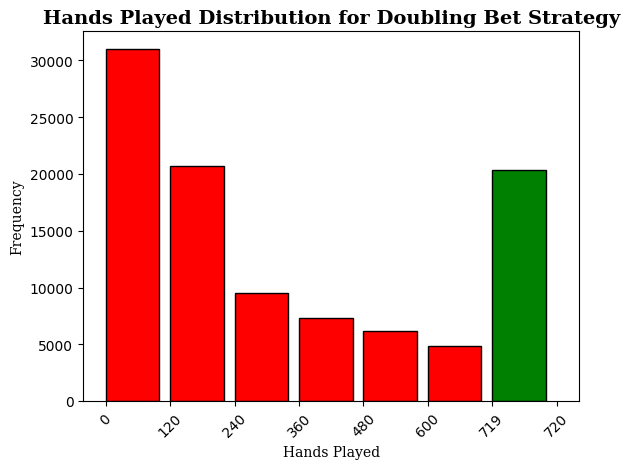

In [4]:
bin_ranges = [0,120,240,360,480,600,719,720,840]
x_ticks_range = [0,120,240,360,480,600,719,840]
x_ticks_string = ['0','120','240','360','480','600','719','720']

counts, bins, patches = plt.hist(hands_played_lst, bins = bin_ranges, color = 'Red', edgecolor = 'black')
for i, count in enumerate(counts):
    if bins[i] == 720:
        patches[i].set_facecolor('green')

for patch in patches:
  patch.set_width(100)
plt.title("Hands Played Distribution for Doubling Bet Strategy", fontname = 'serif', weight = 'bold', fontsize = 14)
plt.xlabel('Hands Played', fontname = 'serif', fontsize = 10)
plt.ylabel('Frequency', fontname = 'serif', fontsize = 10)
plt.xticks(x_ticks_range, x_ticks_string, rotation = 45)
plt.show()

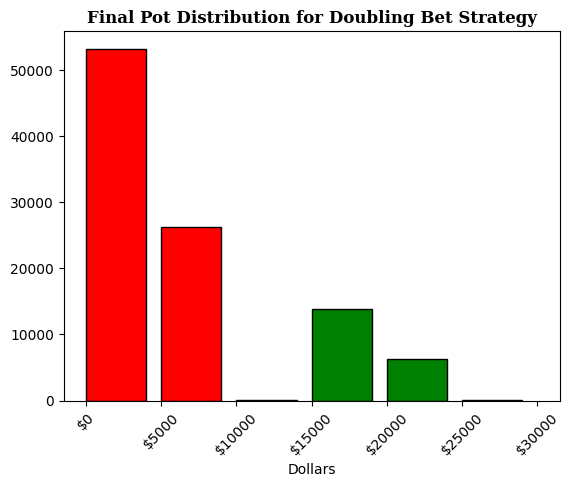

In [5]:
pot_bins = [0,5000,10000,15000,20000,25000,30000]
pot_bins_labels = []
for t in pot_bins:
  d_format = f"${t}"
  pot_bins_labels.append(d_format)
count_pot, bins_pot, patches_pot = plt.hist(final_pot_lst, bins = pot_bins, color = 'red', edgecolor = 'black')
for i, count in enumerate(count_pot):
    if pot_bins[i] > 10000:
        patches_pot[i].set_facecolor('green')
for p in patches_pot:
  p.set_width(4000)
plt.title("Final Pot Distribution for Doubling Bet Strategy", fontname = 'serif', weight = 'bold')
plt.xticks(pot_bins, pot_bins_labels,rotation = 45)
plt.xlabel('Dollars')
plt.show()

In [6]:
doubling_profit =[]
for i in final_pot_lst:
  if i>10000:
    doubling_profit.append(i)

doubling_per = (len(doubling_profit)/len(final_pot_lst))*100
print(f'With the doubling your bet strategy, you are profitable {doubling_per:,.2f}% of the time')

With the doubling your bet strategy, you are profitable 20.39% of the time


The next strategy that I am going to test out is adding together the previous two bets in order to make the current bet aftet you lose. The "Addition" Strategy

In [7]:
hands_played_2_lst = []
final_pot_lst_2 = []

for i in range(1,100001):
  bet_lst = [50,75]
  r_counter = 0
  i_bet = 25
  c_bet = i_bet
  p = 10000

  hands_played_2 = 0

  #print(f"pot is {p} Current Bet is {c_bet}")
  while p > c_bet and hands_played_2<720:
    hands_played_2 = hands_played_2+1
    a = random.randint(1,100)
    #Black Jack
    if a <=4:
      p = p + 1.5*c_bet
      c_bet = i_bet
      bet_lst = [50,75]
      r_counter = 0
    #Normal Win
    elif a >=5 and a <= 42:
      p = p + c_bet
      c_bet = i_bet
      bet_lst = [50,75]
      r_counter = 0
    #Draw
    elif a >= 43 and a <=50:
      p = p
    #YOU LOSE
    else:
      if r_counter == 0:
        p = p-c_bet
        c_bet = bet_lst[r_counter]
      elif r_counter == 1:
        p = p-c_bet
        c_bet = bet_lst[r_counter]
      elif r_counter >1:
        p = p-c_bet
        c_bet = bet_lst[r_counter-1] + bet_lst[r_counter-2]
        bet_lst.append(c_bet)
      r_counter+=1
    #print(f"pot is {p} Current Bet is {c_bet}")
  #print(f"Total number of hands played is {hands_played_2}")
  hands_played_2_lst.append(hands_played_2)
  final_pot_lst_2.append(p)

In [8]:
print(f'The initial pot was $10,000.00 and the initial bet was $25.00')
avg_hands_2 = statistics.mean(hands_played_2_lst)
sd_hands_2 = statistics.stdev(hands_played_2_lst)
max_hands_2 = max(hands_played_2_lst)
min_hands_2 = min(hands_played_2_lst)
print(f'The average number of hands played is {avg_hands_2:,.2f}')
print(f'The standard deviation of final pots is {sd_hands_2:,.2f}')
print(f'The maximum number of hands played is {max_hands_2}')
print(f'The minimum number of hands played is {min_hands_2}')
print()
avg_pot_2 = statistics.mean(final_pot_lst_2)
sd_pot_2 = statistics.stdev(final_pot_lst_2)
max_pot_2 = max(final_pot_lst_2)
min_pot_2 = min(final_pot_lst_2)
print(f'The average final pot is ${avg_pot_2:,.2f}')
print(f'The standard deviation of final pots is ${sd_pot_2:,.2f}')
print(f'The maximum final pot is ${max_pot_2:,.2f}')
print(f'The minimum final pot is ${min_pot_2:,.2f}')

The initial pot was $10,000.00 and the initial bet was $25.00
The average number of hands played is 588.00
The standard deviation of final pots is 214.39
The maximum number of hands played is 720
The minimum number of hands played is 11

The average final pot is $7,134.37
The standard deviation of final pots is $4,299.96
The maximum final pot is $15,375.00
The minimum final pot is $12.50


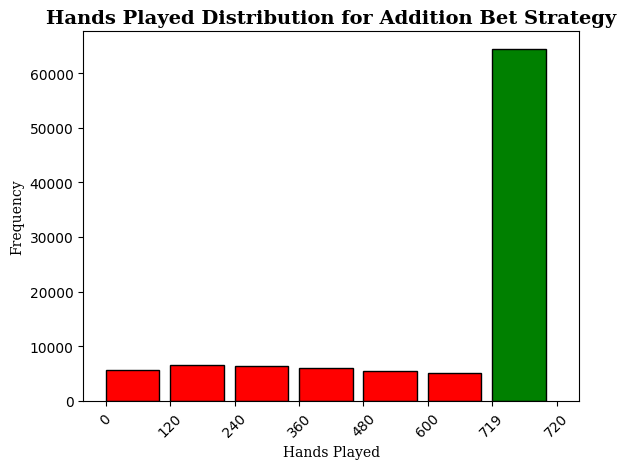

In [9]:
counts_2, bins_2, patches_2 = plt.hist(hands_played_2_lst, bins = bin_ranges, color = 'Red', edgecolor = 'black')
for i, count in enumerate(counts_2):
    if bins_2[i] == 720:
        patches_2[i].set_facecolor('green')

for patch in patches_2:
  patch.set_width(100)
plt.title("Hands Played Distribution for Addition Bet Strategy", fontname = 'serif', weight = 'bold', fontsize = 14)
plt.xlabel('Hands Played', fontname = 'serif', fontsize = 10)
plt.ylabel('Frequency', fontname = 'serif', fontsize = 10)
plt.xticks(x_ticks_range, x_ticks_string, rotation = 45)
plt.show()

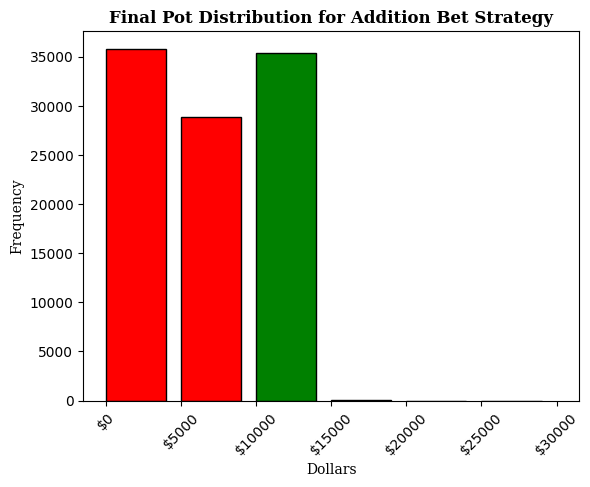

In [10]:
pot_bins_2 = [0,5000,10000,15000,20000,25000,30000]
pot_bins_labels_2 = []
for t in pot_bins_2:
  d_format_2 = f"${t}"
  pot_bins_labels_2.append(d_format_2)

count_pot_2, bins_pot_2, patches_pot_2 = plt.hist(final_pot_lst_2, bins = pot_bins, color = 'red', edgecolor = 'black')
for i, count in enumerate(count_pot_2):
    if pot_bins_2[i] >= 10000:
        patches_pot_2[i].set_facecolor('green')
for pa in patches_pot_2:
  pa.set_width(4000)
plt.title("Final Pot Distribution for Addition Bet Strategy", fontname = 'serif', weight = 'bold')
plt.xticks(pot_bins, pot_bins_labels,rotation = 45)
plt.xlabel('Dollars', fontname = 'serif', fontsize = 10)
plt.ylabel('Frequency', fontname = 'serif', fontsize = 10)
plt.show()

In [11]:
addition_profit =[]
for i in final_pot_lst_2:
  if i>10000:
    addition_profit.append(i)

addition_per = (len(addition_profit)/len(final_pot_lst_2))*100
print(f'With the addition bet strategy, you are profitable {addition_per:,.2f}% of the time')

With the addition bet strategy, you are profitable 35.19% of the time


Now that we have the doubling strategy and the addition strategy, I am going to add a small tweak to each, where you have a goal of $15000 ($5000 or 50% increase) and when you get that money, you are able to leave. In order to speed up the process, I am just going to copy and paste each strategy and add the extra out. Using Colab, this will allow you to see the difference. Only problem is for each of the four strategies, I am going to have to run each cell, which is alright for this situation.

In [13]:
hands_played_lst_15 = []
final_pot_lst_15 = []

for i in range(1,100000):
  pot_15 = 10000
  initial_bet_15 = 25
  current_bet_15 = initial_bet_15
  hands_played_15 = 0

  while current_bet_15<pot_15 and hands_played_15<720 and pot_15<15000:
    #print(f'current bet is {current_bet}, pot is {pot} ')
    hands_played_15+=1
    x_15 = random.randint(1,100)
    if x_15<=4:
      pot_15 = pot_15+ 1.5*current_bet_15
      current_bet_15 = initial_bet_15
    elif x_15>=5 and x_15<=42:
      pot_15 = pot_15 + current_bet_15
      current_bet_15 = initial_bet_15
    elif x_15>=43 and x_15<=92:
      pot_15 = pot_15 - current_bet_15
      current_bet_15 = current_bet_15*2
    else:
      pot_15 = pot_15
      current_bet_15 = current_bet_15
    if current_bet_15>pot_15 or hands_played_15 ==720 or pot_15>=15000:
      #print(f'You played {hands_played} hands. Final pot is {pot}')
      hands_played_lst_15.append(hands_played_15)
      final_pot_lst_15.append(pot_15)

In [14]:
print(f'The initial pot was $10,000.00 and the initial bet was $25.00')
avg_hands_15 = statistics.mean(hands_played_lst_15)
sd_hands_15 = statistics.stdev(hands_played_lst_15)
max_hands_15 = max(hands_played_lst_15)
min_hands_15 = min(hands_played_lst_15)
print(f'The average number of hands played is {avg_hands_15:,.2f}')
print(f'The standard deviation of number of hands played is {sd_hands_15:,.2f}')
print(f'The maximum number of hands played is {max_hands_15}')
print(f'The minimum number of hands played is {min_hands_15}')
print()

avg_pot_15 = statistics.mean(final_pot_lst_15)
sd_pot_15 = statistics.stdev(final_pot_lst_15)
max_pot_15 = max(final_pot_lst_15)
min_pot_15 = min(final_pot_lst_15)
print(f'The average final pot is ${avg_pot_15:,.2f}')
print(f'The standard deviation of final pots is ${sd_pot_15:,.2f}')
print(f'The maximum final pot is ${max_pot_15:,.2f}')
print(f'The minimum final pot is ${min_pot_15:,.2f}')

The initial pot was $10,000.00 and the initial bet was $25.00
The average number of hands played is 227.77
The standard deviation of number of hands played is 140.73
The maximum number of hands played is 516
The minimum number of hands played is 8

The average final pot is $8,215.04
The standard deviation of final pots is $5,519.35
The maximum final pot is $18,212.50
The minimum final pot is $12.50


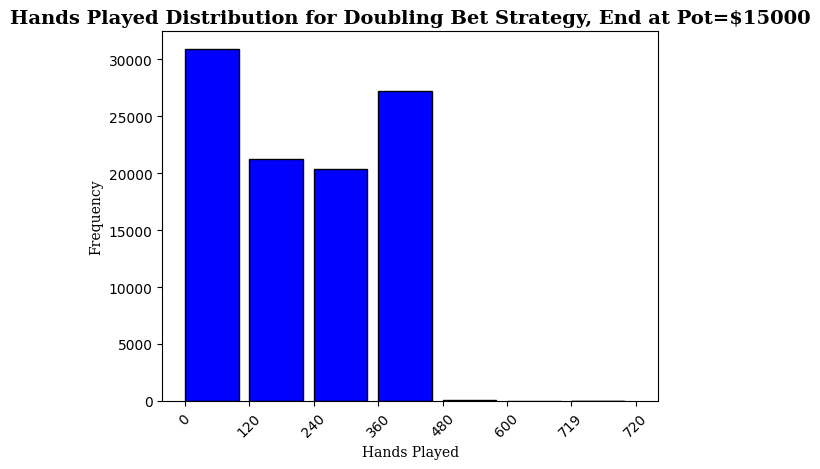

In [16]:
bin_ranges_15 = [0,120,240,360,480,600,719,720,840]
x_ticks_range_15 = [0,120,240,360,480,600,719,840]
x_ticks_string_15 = ['0','120','240','360','480','600','719','720']

counts_15, bins_15, patches_15 = plt.hist(hands_played_lst_15, bins = bin_ranges_15, color = 'Blue', edgecolor = 'black')

for patch in patches_15:
  patch.set_width(100)
plt.title("Hands Played Distribution for Doubling Bet Strategy, End at Pot=$15000", fontname = 'serif', weight = 'bold', fontsize = 14)
plt.xlabel('Hands Played', fontname = 'serif', fontsize = 10)
plt.ylabel('Frequency', fontname = 'serif', fontsize = 10)
plt.xticks(x_ticks_range_15, x_ticks_string_15, rotation = 45)
plt.show()

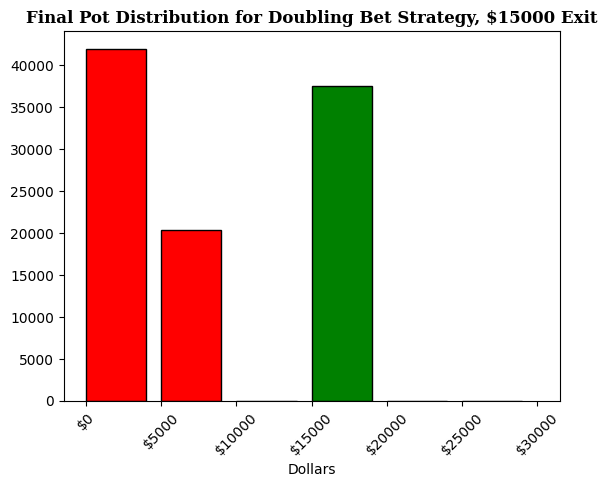

In [30]:
pot_bins_15 = [0,5000,10000,15000,20000,25000,30000]
pot_bins_labels_15 = []
for t in pot_bins:
  d_format = f"${t}"
  pot_bins_labels_15.append(d_format)
count_pot_15, bins_pot_15, patches_pot_15 = plt.hist(final_pot_lst_15, bins = pot_bins_15, color = 'red', edgecolor = 'black')
for i, count in enumerate(count_pot_15):
    if pot_bins_15[i] > 10000:
        patches_pot_15[i].set_facecolor('green')
for p in patches_pot_15:
  p.set_width(4000)
plt.title("Final Pot Distribution for Doubling Bet Strategy, $15000 Exit", fontname = 'serif', weight = 'bold')
plt.xticks(pot_bins_15, pot_bins_labels_15,rotation = 45)
plt.xlabel('Dollars')
plt.show()

In [19]:
doubling_profit_15 =[]
for i in final_pot_lst_15:
  if i>10000:
    doubling_profit_15.append(i)

doubling_per_15 = (len(doubling_profit_15)/len(final_pot_lst_15))*100
print(f'With the doubling your bet strategy and a 15000 exit, you are profitable {doubling_per_15:,.2f}% of the time')

With the doubling your bet strategy and a 15000 exit, you are profitable 37.54% of the time


In [20]:
hands_played_2_lst_15 = []
final_pot_lst_2_15 = []

for i in range(1,100001):
  bet_lst_15 = [50,75]
  r_counter_15 = 0
  i_bet_15 = 25
  c_bet_15 = i_bet
  p_15 = 10000

  hands_played_2_15 = 0

  #print(f"pot is {p} Current Bet is {c_bet}")
  while p_15 > c_bet_15 and hands_played_2_15<720 and p_15<15000:
    hands_played_2_15 = hands_played_2_15+1
    a_15 = random.randint(1,100)
    #Black Jack
    if a_15 <=4:
      p_15 = p_15 + 1.5*c_bet_15
      c_bet_15 = i_bet_15
      bet_lst_15 = [50,75]
      r_counter_15 = 0
    #Normal Win
    elif a_15 >=5 and a_15 <= 42:
      p_15 = p_15 + c_bet_15
      c_bet_15 = i_bet_15
      bet_lst_15 = [50,75]
      r_counter_15 = 0
    #Draw
    elif a_15 >= 43 and a_15 <=50:
      p_15 = p_15
    #YOU LOSE
    else:
      if r_counter_15 == 0:
        p_15 = p_15-c_bet_15
        c_bet_15 = bet_lst_15[r_counter_15]
      elif r_counter_15 == 1:
        p_15 = p_15-c_bet_15
        c_bet_15 = bet_lst_15[r_counter_15]
      elif r_counter_15 >1:
        p_15 = p_15-c_bet_15
        c_bet_15 = bet_lst_15[r_counter_15-1] + bet_lst_15[r_counter_15-2]
        bet_lst_15.append(c_bet_15)
      r_counter_15+=1
  hands_played_2_lst_15.append(hands_played_2_15)
  final_pot_lst_2_15.append(p_15)

In [21]:
print(f'The initial pot was $10,000.00 and the initial bet was $25.00')
avg_hands_2_15 = statistics.mean(hands_played_2_lst_15)
sd_hands_2_15 = statistics.stdev(hands_played_2_lst_15)
max_hands_2_15 = max(hands_played_2_lst_15)
min_hands_2_15 = min(hands_played_2_lst_15)
print(f'The average number of hands played is {avg_hands_2_15:,.2f}')
print(f'The standard deviation of final pots is {sd_hands_2_15:,.2f}')
print(f'The maximum number of hands played is {max_hands_2_15}')
print(f'The minimum number of hands played is {min_hands_2_15}')
print()
avg_pot_2_15 = statistics.mean(final_pot_lst_2_15)
sd_pot_2_15 = statistics.stdev(final_pot_lst_2_15)
max_pot_2_15 = max(final_pot_lst_2_15)
min_pot_2_15 = min(final_pot_lst_2_15)
print(f'The average final pot is ${avg_pot_2_15:,.2f}')
print(f'The standard deviation of final pots is ${sd_pot_2_15:,.2f}')
print(f'The maximum final pot is ${max_pot_2_15:,.2f}')
print(f'The minimum final pot is ${min_pot_2_15:,.2f}')

The initial pot was $10,000.00 and the initial bet was $25.00
The average number of hands played is 587.32
The standard deviation of final pots is 214.99
The maximum number of hands played is 720
The minimum number of hands played is 11

The average final pot is $7,126.40
The standard deviation of final pots is $4,313.80
The maximum final pot is $15,012.50
The minimum final pot is $12.50


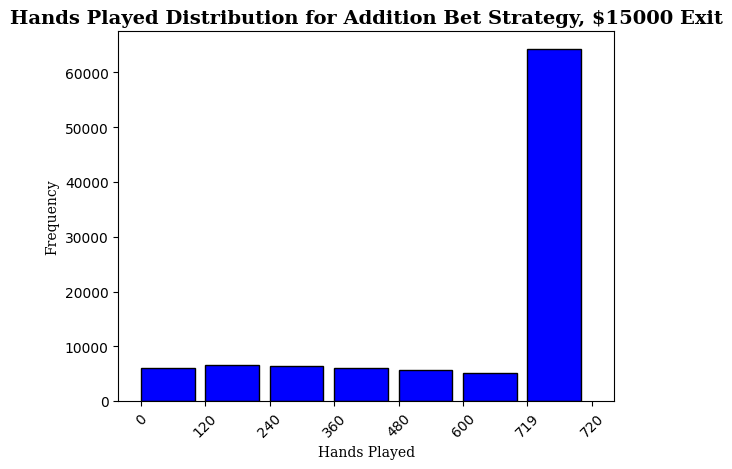

In [28]:
counts_2_15, bins_2_15, patches_2_15 = plt.hist(hands_played_2_lst_15, bins = bin_ranges, color = 'Blue', edgecolor = 'black')

for patch in patches_2_15:
  patch.set_width(100)
plt.title("Hands Played Distribution for Addition Bet Strategy, $15000 Exit", fontname = 'serif', weight = 'bold', fontsize = 14)
plt.xlabel('Hands Played', fontname = 'serif', fontsize = 10)
plt.ylabel('Frequency', fontname = 'serif', fontsize = 10)
plt.xticks(x_ticks_range, x_ticks_string, rotation = 45)
plt.show()

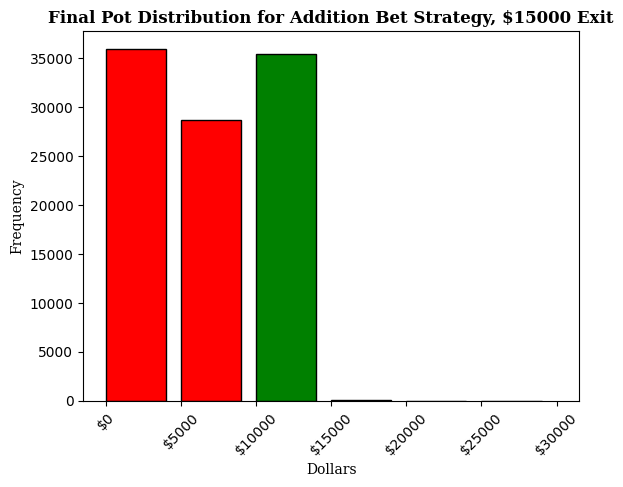

In [29]:
pot_bins_2_15 = [0,5000,10000,15000,20000,25000,30000]
pot_bins_labels_2_15 = []
for t in pot_bins_2_15:
  d_format_2 = f"${t}"
  pot_bins_labels_2_15.append(d_format_2)

count_pot_2_15, bins_pot_2_15, patches_pot_2_15 = plt.hist(final_pot_lst_2_15, bins = pot_bins_2_15, color = 'red', edgecolor = 'black')
for i, count in enumerate(count_pot_2_15):
    if pot_bins_2_15[i] >= 10000:
        patches_pot_2_15[i].set_facecolor('green')
for pa in patches_pot_2_15:
  pa.set_width(4000)
plt.title("Final Pot Distribution for Addition Bet Strategy, $15000 Exit", fontname = 'serif', weight = 'bold')
plt.xticks(pot_bins_2_15, pot_bins_labels_2_15,rotation = 45)
plt.xlabel('Dollars', fontname = 'serif', fontsize = 10)
plt.ylabel('Frequency', fontname = 'serif', fontsize = 10)
plt.show()

In [27]:
addition_profit_15 =[]
for i in final_pot_lst_2_15:
  if i>10000:
    addition_profit_15.append(i)

addition_per_15 = (len(addition_profit_15)/len(final_pot_lst_2_15))*100
print(f'With the addition bet strategy, $15000 exit, you are profitable {addition_per_15:,.2f}% of the time')

With the addition bet strategy, $15000 exit, you are profitable 35.27% of the time
